In [1]:
# import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# EDA

In [2]:
# read in data
logins = pd.read_json('logins.json')

In [3]:
# Check a sample of logins data
logins.sample(10)

,login_time
49492,1970-03-05 01:09:12
14742,1970-01-22 23:59:34
65283,1970-03-19 00:01:54
44287,1970-02-27 21:53:49
36427,1970-02-19 22:14:24
78982,1970-03-31 04:41:39
86572,1970-04-06 14:18:16
35472,1970-02-18 21:03:59
32004,1970-02-14 14:42:16
57617,1970-03-13 02:52:24


In [4]:
# Check first and last represented logins
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
# Switch index to timestamp
logins_switched = pd.Series(logins.index,index=logins.login_time)
logins_switched.head()

login_time
1970-01-01 20:13:18    0
1970-01-01 20:16:10    1
1970-01-01 20:16:37    2
1970-01-01 20:16:36    3
1970-01-01 20:26:21    4
dtype: int64

In [7]:
# Create 15-minute bins
logins_agg = pd.DataFrame(logins_switched.resample(rule='15min',group_keys=True).count(),columns=['count'])
logins_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
# Find daily cycle
daily_cycle = logins_agg.groupby(logins_agg.index.time).sum()
daily_cycle.head()

,count
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


In [9]:
# Use a datetime to make the time series graphable
daily_cycle['time'] = pd.to_datetime('1970-01-01 ' + daily_cycle.index.astype(str))
daily_cycle.head()

,count,time
00:00:00,1439,1970-01-01 00:00:00
00:15:00,1547,1970-01-01 00:15:00
00:30:00,1525,1970-01-01 00:30:00
00:45:00,1482,1970-01-01 00:45:00
01:00:00,1549,1970-01-01 01:00:00


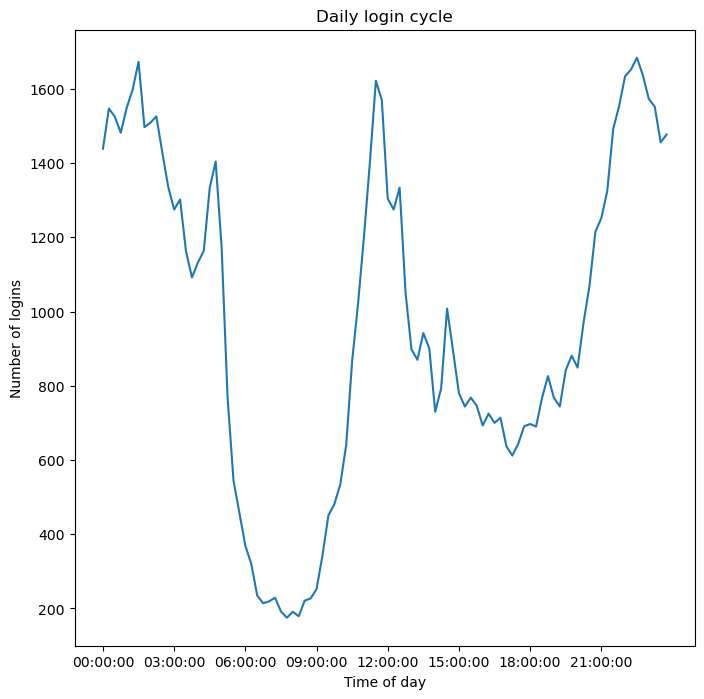

In [25]:
# Plot timeseries as lineplot
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(daily_cycle['time'],daily_cycle['count'])
ax.set_xticks(daily_cycle.time[::12])
ax.set_xticklabels(daily_cycle.index[::12])
plt.title("Daily login cycle")
plt.xlabel("Time of day")
plt.ylabel("Number of logins")
plt.savefig('daily_cycle.png');

In [13]:
day_agg = pd.DataFrame(logins_switched.resample(rule='1d',group_keys=True).count(),columns=['count'])
day_agg.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


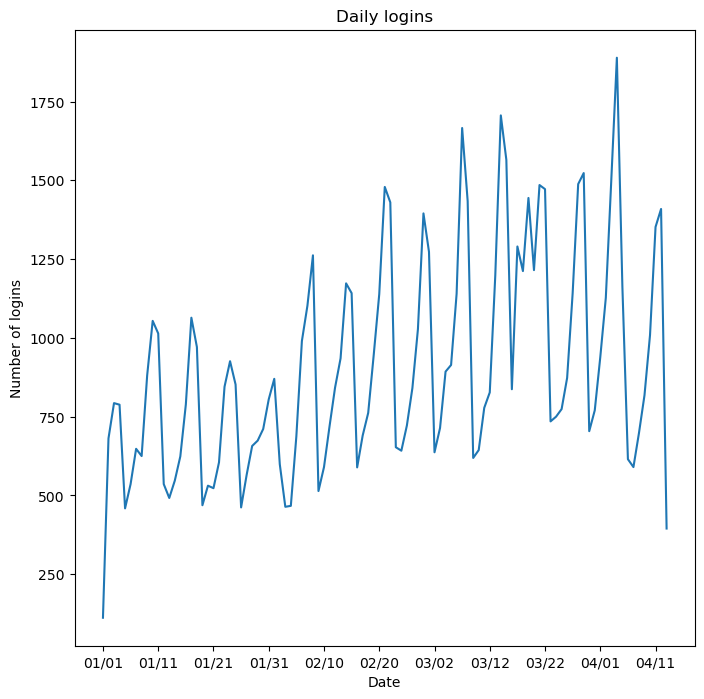

In [24]:
# Create lineplot of logins by day
day_interval = 10
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(day_agg.index,day_agg['count'])
ax.set_xticks(day_agg.index[::day_interval])
ax.set_xticklabels(day_agg.index[::day_interval].strftime('%m/%d'))
plt.xlabel('Date')
plt.ylabel('Number of logins')
plt.title('Daily logins')
plt.savefig('daily_logins.png');

In [15]:
# Find weekday for each login
weekly = logins
weekly['weekday'] = logins['login_time'].dt.day_of_week
weekly.sample(5)

,login_time,weekday
88639,1970-04-09 16:35:24,3
36991,1970-02-20 11:14:33,4
55137,1970-03-09 22:40:23,0
31312,1970-02-14 00:37:13,5
85149,1970-04-05 00:41:57,6


In [16]:
# Aggregate logins by weekday
weekly_agg = weekly.groupby('weekday').count()
weekly_agg.columns=['count']
weekly_agg

,count
weekday,
0,8823
1,9268
2,10339
3,11960
4,15208
5,19377
6,18167


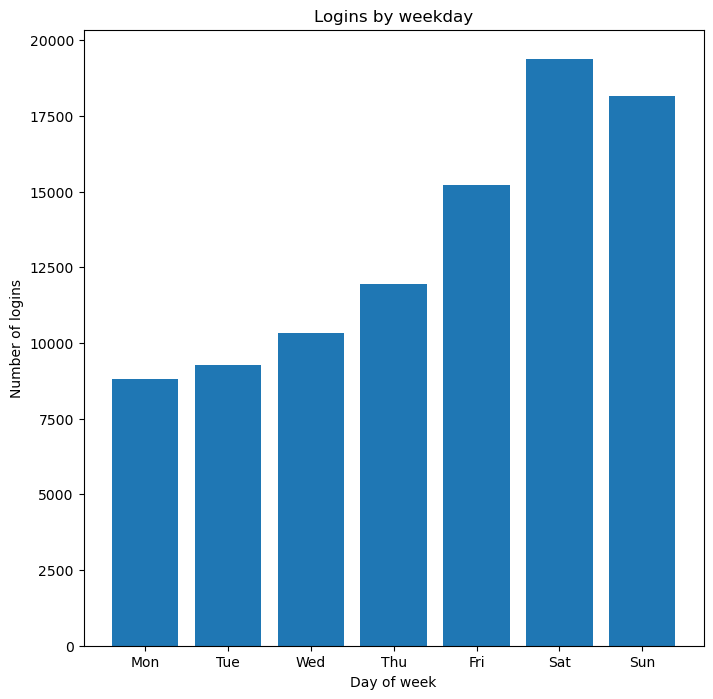

In [23]:
# Create bar plot of logins by day of week
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=weekly_agg.index,height=weekly_agg['count'])
ax.set_xticks(weekly_agg.index)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of week')
plt.ylabel('Number of logins')
plt.title('Logins by weekday')
plt.savefig('weekday_logins.png');

In [26]:
# Aggregate logins by week
logins_by_week = pd.DataFrame(logins_switched.resample(rule='7d',group_keys=True).count(),columns=['count'])
logins_by_week.head()

,count
login_time,
1970-01-01,4017
1970-01-08,5149
1970-01-15,4971
1970-01-22,4912
1970-01-29,4590


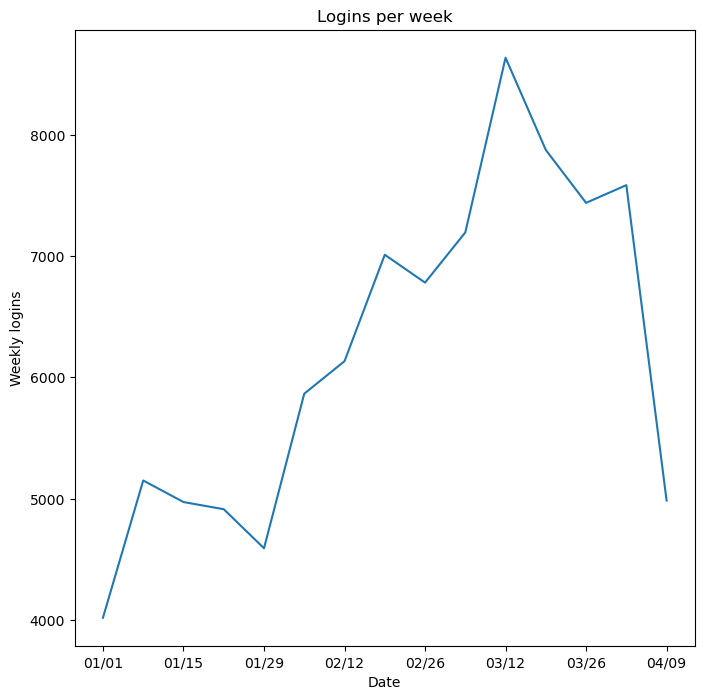

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(logins_by_week.index,logins_by_week['count'])
ax.set_xticks(logins_by_week.index[::2])
ax.set_xticklabels(logins_by_week.index[::2].strftime('%m/%d'))
plt.xlabel('Date')
plt.ylabel('Weekly logins')
plt.title('Logins per week')
plt.savefig('logins_per_week.png')